<a href="https://colab.research.google.com/github/hasanenesguray/mavi/blob/main/Copy_of_HW2_CS412_2023_starter_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Homework 2

In [ ]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

import random
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
# set the seeds for reproducibility
random.seed(412)
np.random.seed(412)

# Generate Data for Regression

In [ ]:
def mapping(x, slope, bias):
  y = slope * x + bias  # linear function
  return y


def generate_data(f, N, x_min, x_max):
  x_standard = np.random.rand(N, 1) # x values uniformly sampled from range [0, 1]
  x = x_standard * (x_max - x_min) + x_min   # carrying x values to the desired range [x_min, x_max]
  y = f(x) # compute y values from the underlying function f
  eps = 0.1 * np.random.randn(*y.shape)   # Gaussian noise with 0.1 standard deviation 
  return x, y + eps   # return x's and corrupted f(x) values 

In [ ]:
### PARAMETERS FOR THE DATA GENERATION ###
slope, bias = 2.5, 0.5    # slope (w1) and bias (w0) of the linear component
x_min, x_max = 0.0, 1.0   # range of x values
N = 50                   # number of samples

# set the slope, bias parameters of the mapping() function; leave x
f = lambda x : mapping(x, slope=slope, bias=bias)

# generate N samples with function f, where the x is in range [x_min, x_max]
x, y = generate_data(f, N, x_min, x_max)
print('x.shape :', x.shape, ', y.shape :', y.shape)

x.shape : (50, 1) , y.shape : (50, 1)


### 50% Train 50% Validation Split

In [ ]:
# Partition the dataset into train and test datasets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)

# Make a scatter plot of the data

In [ ]:
def plot_samples(train_data, val_data=None):
  fig, ax = plt.subplots(figsize=(8, 6), dpi=100)  
  
  x_train, y_train = train_data
  ax.scatter(x_train, y_train, label='train samples')
  if val_data:
    x_val, y_val = val_data
    ax.scatter(x_val, y_val, label='val samples')
  
  ax.set_xlim([-0.05, 1.05])  # need to change 
  ax.set_ylim([-0.05, 3.55])  # need to change 
  ax.set_xlabel('x', fontsize=12)
  ax.set_ylabel('f(x)', fontsize=12)
  ax.set_title('Simulated Nonlinear Data')
  ax.legend(loc='lower right')
  return fig, ax

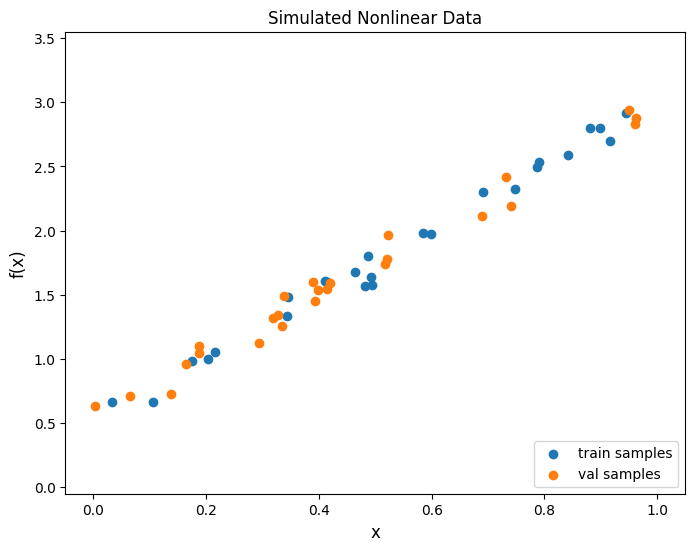

In [ ]:
# Plot train and test datasets
fig, ax = plot_samples(train_data=(x_train, y_train), val_data=(x_val, y_val))

In [ ]:
del x, y, x_train, y_train, x_val, y_val # I am deleting the variables so that you can start from scratch

#**Your job starts here!**

In this homework, we'll explore different regression techniques and their applications using sklearn and NumPy libraries. We'll start by considering **Dataset 1** (see the PDF document for this homework), which has a **linear** relationship between the input variable (**x**) and the target variable (**y**), and use linear regression to model this relationship. 

First, let's generate Dataset 1:



In [ ]:
# use the generate_data function to get x, y. Do not change N, x_min, and x_max
x, y = generate_data(f, N, x_min, x_max)
# split the data to train and validation sets 50%-50% <-- after splitting, you can add a print statement to check the data shapes
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)
print('x_train.shape :', x_train.shape, ', y_train.shape :', y_train.shape)
print('x_val.shape :', x_val.shape, ', y_val.shape :', y_val.shape)

x_train.shape : (25, 1) , y_train.shape : (25, 1)
x_val.shape : (25, 1) , y_val.shape : (25, 1)


# Part 1.a (10pts)

Our objective in Part 1.a is to use sklearn's linear regression model on Dataset 1. The main steps are as follows:  

1.   Initialize the model
2.   Fit it to the data
3.   Make predictions on the validation set

Then, we will evaluate the performance of the model on the validation set using the **mean squared error (MSE)** metric and print the result.

In [ ]:
# import the linear regression model from the sklearn.linear_model module.
from sklearn.linear_model import LinearRegression
# import the mean squared error function from sklearn.metrics
from sklearn.metrics import mean_squared_error

# initialize the linear regression model
lr_model = LinearRegression()
# fit the model to the data
lr_model.fit(x_train, y_train)
# find the model's predictions on the validation set
y_predicted = lr_model.predict(x_val)

# evaluate the model's performance on the validation set using mean squared error (MSE)
mse_sklearn = mean_squared_error(y_val, y_predicted)
# print the model's mean squared error using this--> print('MSE of sklearn model: ', mse_sklearn)
print('MSE of sklearn model: ', mse_sklearn)

MSE of sklearn model:  0.00795462682779033


Next, we'll visualize the linear regression model's fit to Dataset 1 by drawing the **regression line** onto a scatter plot of the train and validation samples. To do this:

1.   Make a scatter plot of train and validation samples using the **plot_samples()** function.
2.   Draw the regression line onto this plot by following the directions in the comments.

By looking at the plot, we can get an idea of how well the linear regression model fits the data.

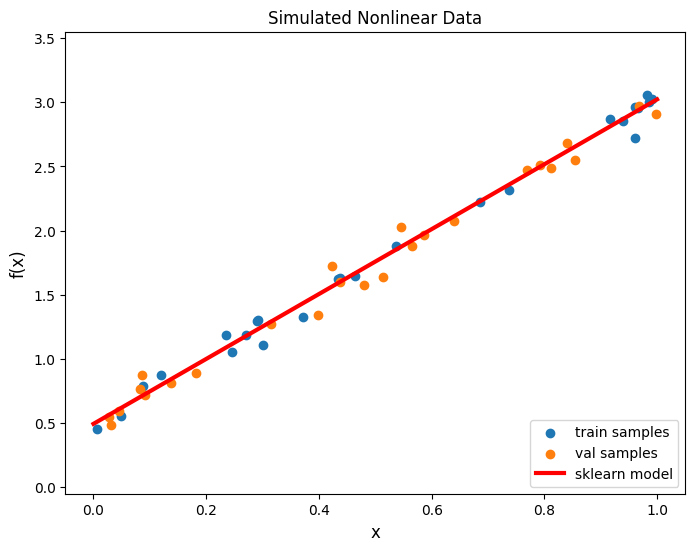

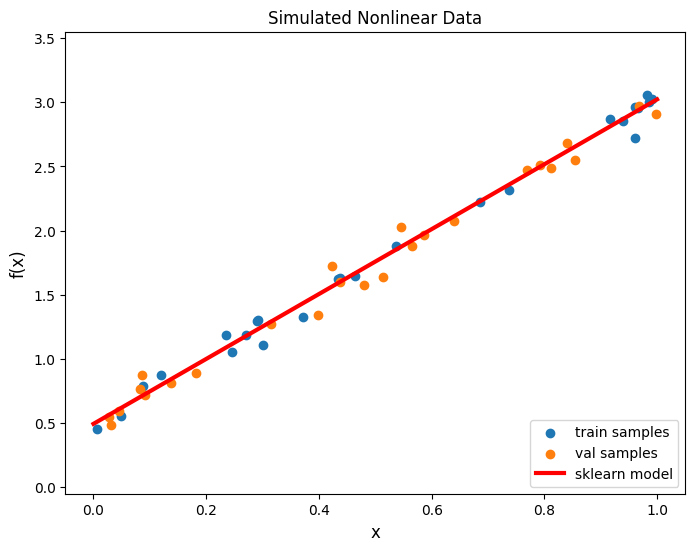

In [ ]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
fig, ax = plot_samples(train_data=(x_train, y_train), val_data=(x_val, y_val)) # uncomment this line after filling in the parantheses, just like we did above


x_grid = np.linspace(x_min, x_max, 100) # do not change anything in this line
# now use the model's predict() function on x_grid to find y_grid
y_grid = lr_model.predict(x_grid.reshape(-1,1))

ax.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model') # uncomment this line after obtaining y_grid
ax.legend(loc='lower right') # uncomment this line too
display(fig) # uncomment this line too

Great! Now you know how to find the regression coefficients using the sklearn's linear regression model, and how to plot the regression line. Let's proceed to **Part 1.b**

# Part 1.b (10pts)

In this part, we will use the pseudo-inverse solution manually to find the optimal regression coefficients. The main steps are as follows:

1.   Constructing the extended data matrix **X** that includes a column of ones for the bias (intercept) term. 
2.   Taking the pseudo-inverse (pinv) of **X**.
3.   Finding regression coefficients **w** by using the equation **w** = pinv(**X**) * **y**. 

*(Note that pinv(**X**) is a 2 x N matrix and **y** is an N x 1 vector. As a result, **w** has dimensions 2 x 1)*

In [ ]:
from numpy.linalg import pinv
''' In the next two lines, construct the extended data matrices for training and validation,
by adding a column of ones to the original data matrix. For this, you can use np.concatenate() 
function with the option axis=1. See the function documentation for further information''' 
# 1. construct the extended data matrix for train
x_train_extended = np.concatenate((x_train.reshape(-1,1), np.ones((25,1))),axis=1)
# 2. construct the extended data matrix for val
x_val_extended = np.concatenate((x_val.reshape(-1,1), np.ones((25,1))),axis=1)

# print the shapes of the extended data matrices, just to check
print('x_train_extended.shape :', x_train_extended.shape)
print('x_val_extended.shape :', x_val_extended.shape)

# 3.1. find the pseudoinverse (pinv) of the extended data matrix
x_train_pinv = np.linalg.pinv(x_train_extended)
# 3.2. perform the matrix multiplication pinv(X_extended) * y to find regression coefficients (w) ## look up np.matmul() function
w = np.matmul(x_train_pinv,y_train)

# find the models prediction on validation set
y_val_pred = np.matmul(x_val_extended, w)
# evaluate the model's performance on the validation set using mean squared error (MSE)
mse = mean_squared_error(y_val, y_val_pred)
# print the model's mean squared error using this --> print('MSE of manual model: ', mse)
print('MSE of manual model: ', mse)

x_train_extended.shape : (25, 2)
x_val_extended.shape : (25, 2)
MSE of manual model:  0.007954626827790339


Now that you have implemented your own linear regression algorithm and found the regression coefficients, let's visualize the results.

We will follow similar steps as in **Part 1.a** to draw the regression line found by your implementation onto the scatter plot of Dataset 1. Please follow the directives in the comments for details.

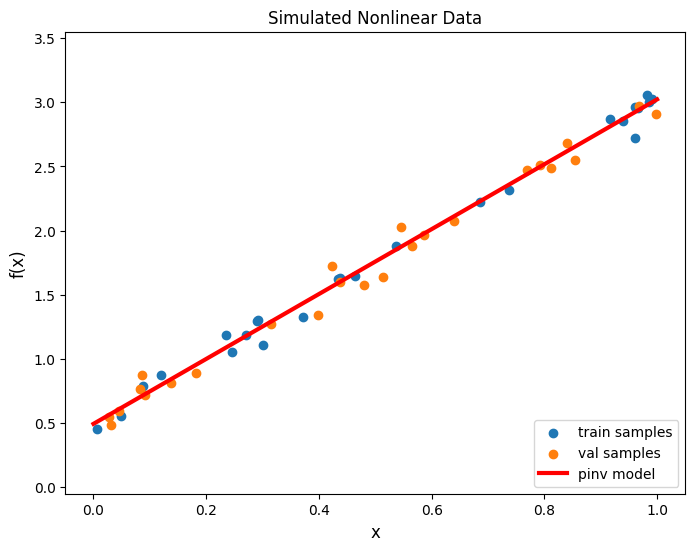

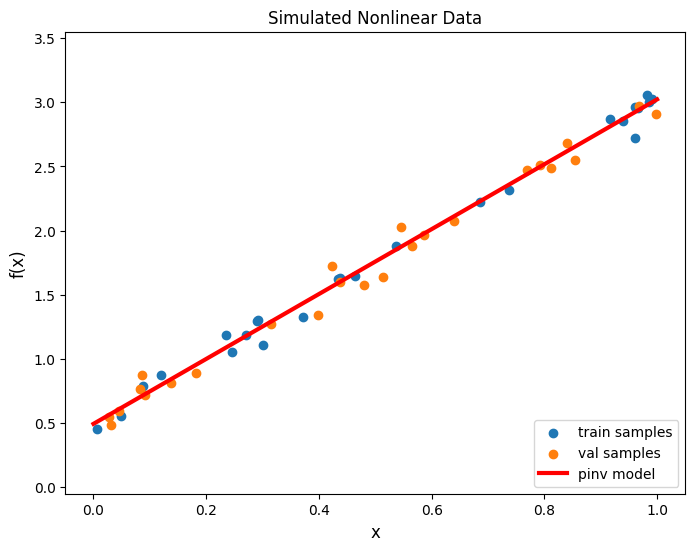

In [ ]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
fig, ax = plot_samples(train_data=(x_train, y_train), val_data=(x_val, y_val)) # uncomment this line after filling in the parantheses, just like we did above


x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line
# first, construct the extended version of x_grid, just like you did to train and validation data matrices
x_grid_extended = np.concatenate((x_grid, np.ones_like(x_grid)),axis=1)
# now, using the regression coefficients, find the model's predictions (y_grid = Xw)
y_grid = np.matmul(x_grid_extended, w)

ax.plot(x_grid, y_grid, color='red', linewidth=3, label='pinv model') # uncomment this line after obtaining y_grid
ax.legend(loc='lower right') # uncomment this line too
display(fig) # uncomment this line too

Now you also know how to find the regression coefficients manually using the pseudoinverse method. In the last piece of **Part 1**, we're going to find the regression via gradient descent (GD) method. Let's proceed:

# Part 1.c (25pts)

In this part, we're going to implement gradient descent optimization algorithm to find regression coefficients in an iterative manner. Starting with initial regression coefficients, we're going to take small steps in directions which minimizes the mean squared error. The main steps of the algorithm are as follows:


0.   Make sure that your extended data matrices (computed in **Part 1.b**) have dimensions of (N x 2), where N is variable. We don't care about what N is, but the second dimension must be two!
1.   Initialize the regression coefficients (i.e., weights **w**) with some values, usually random or zero.
2.   Choose a step size (i.e., learning rate **lr**) which determines the size of the steps we take in the direction of minimizing the cost function (**MSE**).
3.   Repeat the following steps for **M** steps:

     1.   Compute the predicted values using the current regression coefficients and input data:
        **y_pred** = **X** * **w**
        
        *Note that **X** * **w** is matrix multiplication of **X** and **w**.*
     2.   Compute the difference between predicted and actual values (i.e., the error):
        **pred_error** = **e** = (**y_pred** - **y**) 
     3.   Compute the gradient of the cost function with respect to the regression coefficients: 
        **w_grad** = (transpose(**X**) * **e**) / **N**

        *Note that transpose(**X**) * **e** is matrix multiplication of transpose(**X**) and **e**, and **N** is the number of samples.*
     4.   Update the regression coefficients by subtracting the gradient times the learning rate from the current coefficients. 
     
        (**w** = **w** - **w_grad** * **lr**)
     5.   Calculate the new value of the cost function (**MSE**) using the updated regression coefficients **w** and input data **X**.

4.   Return the final regression coefficients.

**Additional Info**

**X** is an N x 2 matrix. **y** is an N x 1 column vector. **w** is a 2 x 1 column vector. As a result of the matrix multiplication, **y_pred** = **X** * **w** should also have dimensions of N x 1, same with **y** !

transpose(**X**) has dimensions of 2 x N. Similarly, the matrix multiplication transpose(**X**) * **e** yields **w_grad** with dimensions 2 x 1, same with **w** !

These values are here for you to check yourself while writing your code. While developing your code, use the **shape** property of your numpy arrays sparingly!

In [ ]:
M = 1000 # number of iterations
lr = 0.1 # learning_rate, you don't have to play with this value.

# initialize your regression coefficients using np.zeros() or np.random.randn() (what are the dimensions of w ?)
w = np.random.randn(2,1)
for i in range(M):
  '''Follow the steps given above'''
  # 1. Compute the predicted values using the current regression coefficients and input data: y_pred = X * w. Note that X * w is matrix multiplication of X and w.
  y_pred = np.matmul(x_train_extended, w)
  # 2. Compute the difference between predicted and actual values (i.e., the error): pred_error = e = (y_pred - y)
  e = y_pred - y_train
  # 3. Compute the gradient of the cost function with respect to the regression coefficients: w_grad = (transpose(X) * e) / N. Note that transpose(X) * e is matrix multiplication of transpose(X) and e, and N is the number of samples.
  w_grad = np.matmul(x_train_extended.transpose(), e) / N
  # 4. Update the regression coefficients by subtracting the gradient times the learning rate from the current coefficients.(w = w - w_grad * lr)
  w = w - w_grad * lr
  # 5. Calculate the new value of the cost function (MSE) using the updated regression coefficients w and input data X.
  y_pred = np.matmul(x_val_extended, w)
  mse = mean_squared_error(y_val, y_pred)
  if (i == 0) or ((i+1) % 100 == 0):
    print('MSE error at step {}: {:.4f}'.format(i+1, mse ))

MSE error at step 1: 1.5041
MSE error at step 100: 0.5146
MSE error at step 200: 0.2160
MSE error at step 300: 0.0930
MSE error at step 400: 0.0425
MSE error at step 500: 0.0219
MSE error at step 600: 0.0135
MSE error at step 700: 0.0101
MSE error at step 800: 0.0087
MSE error at step 900: 0.0082
MSE error at step 1000: 0.0080


Now, we'll draw the regression line found by your implementation onto the scatter plot of Dataset 1. For that, we're going to:

1.   Make a scatter plot of train and validation samples using plot_samples() function.
2.   Draw the regression line onto this plot by following the directions in the comments.

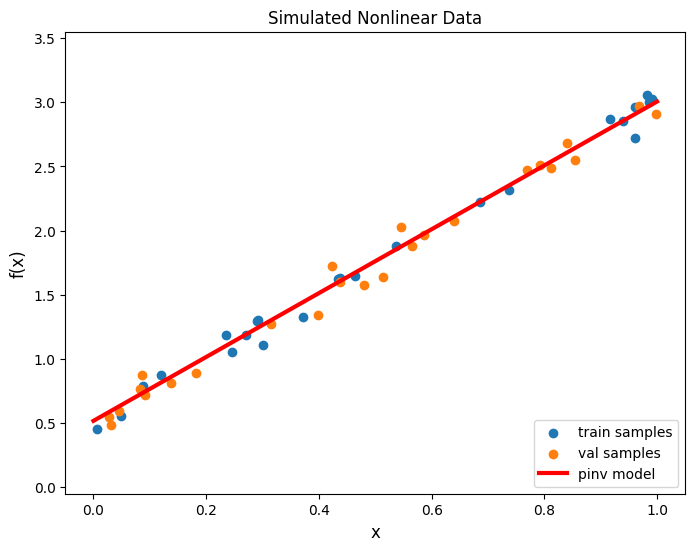

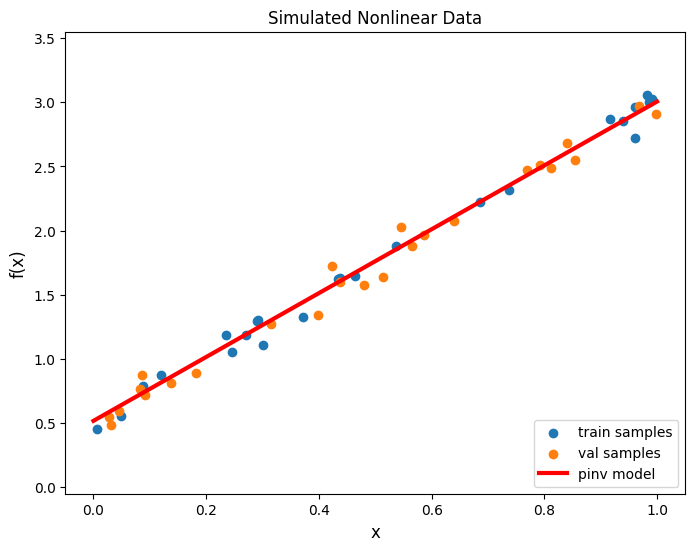

In [ ]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
fig, ax = plot_samples(train_data=(x_train, y_train), val_data=(x_val, y_val)) # uncomment this line after filling in the parantheses, just like we did above

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line
# first, construct the extended version of x_grid, just like you did to train and validation data matrices
x_grid_extended = np.concatenate((x_grid, np.ones_like(x_grid)),axis=1)
# now, using the regression coefficients, find the model's predictions (y_grid = Xw)
y_grid = np.matmul(x_grid_extended, w)

ax.plot(x_grid, y_grid, color='red', linewidth=3, label='pinv model') # uncomment this line after obtaining y_grid
ax.legend(loc='lower right') # uncomment this line too
display(fig) # uncomment this line too

# Part 2 - Data Generation

In Part 2 of the homework, we are moving from **Dataset 1** which has a **linear** relationship between the input variable (**x**) and the target variable (**y**), to **Dataset 2** which has a **non-linear** relationship between **x** and **y**, requiring the use of non-linear regression techniques to model the relationship, such as polynomial regression.

In this part, we are going to load the data from an **.npy** file, which is a file format used to store numerical data in Python, optimized for use with the NumPy library.

In [ ]:
x = np.load('/content/dataset2_data.npy')
y = np.load('/content/dataset2_labels.npy')

# Write code to split the data to train and validation sets 50%-50% <-- after splitting, you can add a print statement to check the data shapes
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)
print('x_train.shape :', x_train.shape, ', y_train.shape :', y_train.shape)
print('x_val.shape :', x_val.shape, ', y_val.shape :', y_val.shape)

x_train.shape : (25, 1) , y_train.shape : (25, 1)
x_val.shape : (25, 1) , y_val.shape : (25, 1)



# Part 2.a (20pts)

Our objective in Part 2.a is to use the sklearn library for performing linear regression on **polynomial features**. To do this,

1.   We'll use **PolynomialFeatures** from the **sklearn.preprocessing** module to expand our input data matrix **X** with polynomial features. 
2.   Then, we'll use **LinearRegression** from **sklearn.linear_model** to fit the model to X.
3.   Make predictions on the validation set. 

We'll evaluate the model's performance on the validation set using the **mean squared error (MSE)** metric and print the result.

Try polynomial degrees of 1, 3, 5, and 7 and comment on the best model in your report.

*-Please check the documentation of PolynomialFeatures before starting this part.*

In [ ]:
# import the polynomial features object from sklearn.preprocessing module
from sklearn.preprocessing import PolynomialFeatures

# order = ... # <-- specify the order of the polynomial features
order = 5 #Among 1,3,5 and 7; the order that provided the lowest mse value was 7.
# construct polynomial features of degree "order" using PolynomialFeatures()
pf = PolynomialFeatures(degree=order)
# fit the polynomial features to training data using fit_transform() function of your PolynomialFeatures object
x_trained_pf = pf.fit_transform(x_train)
# transform the validation data using transform() function of your PolynomialFeatures object
x_validated_pf = pf.transform(x_val)
 
# initialize linear regression model
lr_model = LinearRegression()
# fit the model to the polynomial features of training data
lr_model.fit(x_trained_pf, y_train)
# make predictions on validation set
y_predicted = lr_model.predict(x_validated_pf) 

# evaluate the model's performance on the validation set using mean squared error (MSE)
mse_sklearn_polynomial = mean_squared_error(y_val, y_predicted)
# print the model's mean squared error using this--> print('MSE of sklearn model: ', mse_sklearn_polynomial)
print('MSE of sklearn model: ', mse_sklearn_polynomial)

MSE of sklearn model:  0.007475463079281102


Now we're moving on to the plot. This part is similar to the previous ones, but be careful to pick up small differences.

By looking at the plot, we can get an idea of how well the polynomial regression model fits the data.

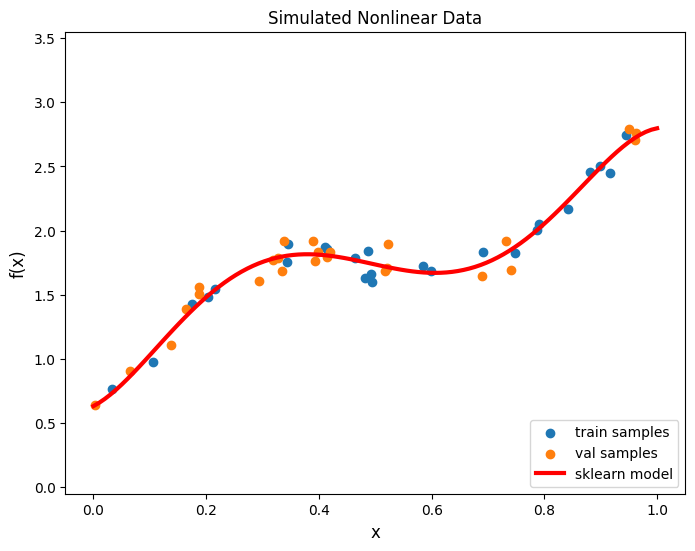

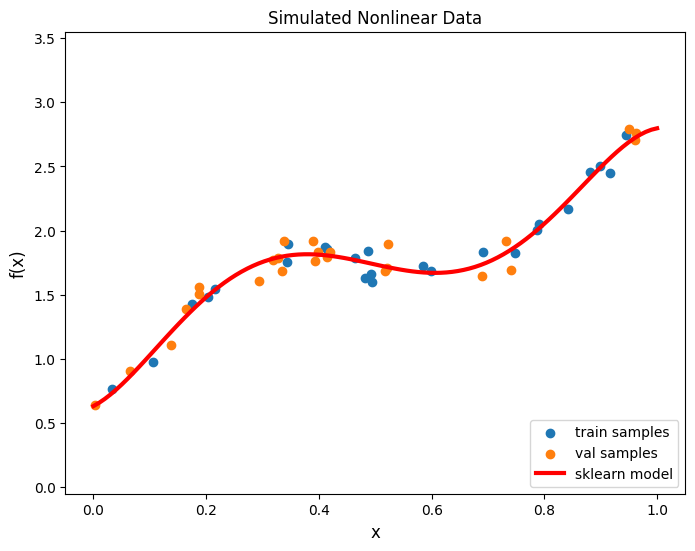

In [ ]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
fig, ax = plot_samples(train_data=(x_train, y_train), val_data=(x_val, y_val)) # uncomment this line after filling in the parantheses, just like we did above

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line
# transform the x_grid the same way you transformed the validation data
x_grid_transformed = pf.transform(x_grid)
# now use the linear regression model's predict() function on transformed x_grid to find y_grid
y_grid = lr_model.predict(x_grid_transformed) 

ax.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model') # uncomment this line after obtaining y_grid
ax.legend(loc='lower right') # uncomment this line too
display(fig) # uncomment this line too

# Part 2.b (15)

In this part, we will implement our own polynomial regression algorithm to find the optimal regression coefficients. The main steps are as follows:

1.   Choose the degree of the polynomial regression as **3**. Above, you were asked to vary this and choose the best model (best polynomial degree) according to validation set; however in this part the aim is just to learn the implementation. 
2.   Constructing the data matrix **X** that includes a column of ones for the bias (intercept) term.
3.   Taking the pseudo-inverse (pinv) of **X**.
4.   Finding regression coefficients **w** by using the equation **w** = pinv(**X**) * **y**. 

*(Note that pinv(**X**) is a (degree+1) x N matrix and **y** is an N x 1 vector. As a result, **w** has dimensions (degree+1) x 1)*

.

.

.

**Illustration for Step 2 of algorithm (for degree 3)** 

From $\quad x = \begin{bmatrix}
x_1 \\ x_2\\ \vdots \\ x_N \\
\end{bmatrix}$, we want to obtain $\quad X = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_N & x_N^2 & x_N^3 \\
\end{bmatrix}$.


where N is the number of samples (in either train or val dataset), and each column holds a power of **x**, starting from 0-th power in the first column, till the **degree** you specified.

In [ ]:
from numpy.linalg import pinv
''' In the next two lines, construct the data matrices containing polynomial features for training and validation,
by adding columns of powers of the original data vector. For this, you can use np.concatenate() 
function with the option axis=1. See the function documentation for further information''' 
# 1. construct the data matrix for train
x_train_pf = np.concatenate([np.ones((x_train.shape[0], 1)), x_train.reshape(-1, 1), (x_train**2).reshape(-1, 1), (x_train**3).reshape(-1, 1)], axis=1)
# 2. construct the data matrix for val
x_val_pf = np.concatenate([np.ones((x_val.shape[0], 1)), x_val.reshape(-1, 1), (x_val**2).reshape(-1, 1), (x_val**3).reshape(-1, 1)], axis=1)

# print the shapes of the data matrices, just to check
print('x_train_pf.shape :', x_train_pf.shape)
print('x_val_pf.shape :', x_val_pf.shape)

# 3.1. find the pseudoinverse (pinv) of the data matrix
x_train_pinv = np.linalg.pinv(x_train_pf)
# 3.2. perform the matrix multiplication pinv(X) * y to find regression coefficients (w) ## look up np.matmul() function
w = np.matmul(x_train_pinv,y_train)

# find the models prediction on validation set 
y_val_pred = np.matmul(x_val_pf, w)
# evaluate the model's performance on the validation set using mean squared error (MSE)
mse = mean_squared_error(y_val, y_val_pred)
# print the model's mean squared error using this --> print('MSE of sklearn model: ', mse_sklearn)
print('MSE of manual model: ', mse)

x_train_pf.shape : (25, 4)
x_val_pf.shape : (25, 4)
MSE of manual model:  0.01205922374286855


Make a plot

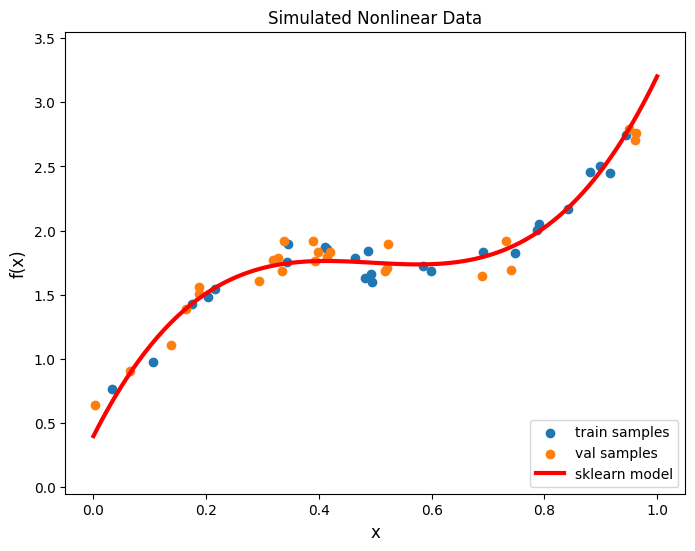

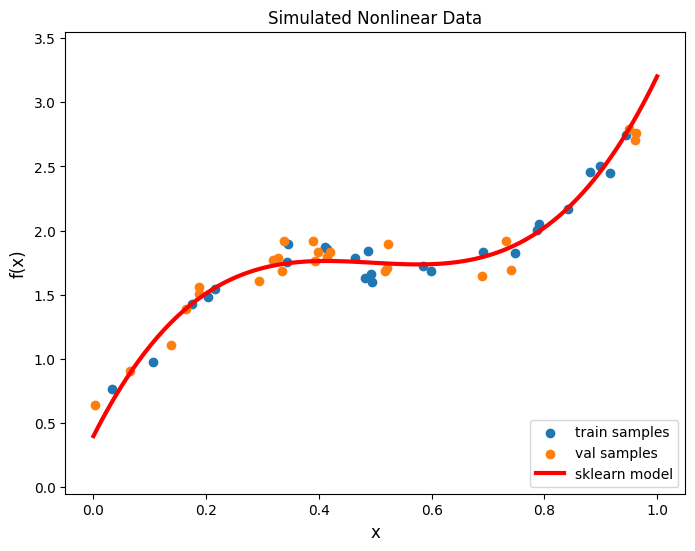

In [ ]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
fig, ax = plot_samples(train_data=(x_train, y_train), val_data=(x_val, y_val)) # uncomment this line after filling in the parantheses, just like we did above

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line
# transform the x_grid the same way you transformed the train and val vectors.
x_grid_extended = np.concatenate([np.ones((x_grid.shape[0], 1)), x_grid.reshape(-1, 1), (x_grid**2).reshape(-1, 1), (x_grid**3).reshape(-1, 1)], axis=1)


# now, using the regression coefficients, find the model's predictions (y_grid = Xw)
y_grid = np.matmul(x_grid_extended, w)

ax.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model') # uncomment this line after obtaining y_grid
ax.legend(loc='lower right') # uncomment this line too
display(fig) # uncomment this line too

# Report (20pts)

*   Prepare a PDF report with the following and **include a link to your Colab Notebook at the top. making sure the link public** (-20pts if missing or not public)!

*   Your report should contain sections in the same order as you're seeing in this notebook and labeled as **Part 1.a Results** etc). **In each part, you should include the regression coefficients you have found in that part and all the plots and MSE errors.**

*   In Part 1, you should comment on whether the gradient descent solution is the same (or very close) to solutions obtained for Part1.a and b. If not, add a line of explanation as to why you think it is not.

*   In Part 2, comment on the effect of the **degree** parameter. What happens when it is chosen too small or too big? What do you think is the optimal **degree** value, and why? Discuss from the perspective of **underfitting**/**overfitting**.